<a href="https://colab.research.google.com/github/pzoliveira/DSKNNIris/blob/main/DSKNNIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Data

In [1]:
import numpy as np
from yellowbrick.classifier import ConfusionMatrix
import pandas as pd

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('iris.data', names=names)

In [3]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Splitting the Data

In [17]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
from sklearn.model_selection import train_test_split

In [19]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.8)

In [20]:
X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((120, 4), (120,), (30, 4), (30,))

# Preprocessing the Data

In [10]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(X_treino)

X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

# Training the Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_classe = KNeighborsClassifier(n_neighbors=6)
knn_classe.fit(X_treino, y_treino)

KNeighborsClassifier(n_neighbors=6)

# Using predict

In [32]:
previsoes = knn_classe.predict(X_teste)
previsoes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [33]:
y_teste

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

# Metrics of the Model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
accuracy_score(y_teste, previsoes)

0.9

In [36]:
confusion_matrix(y_teste, previsoes)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  3,  8]])

In [37]:
print(classification_report(y_teste, previsoes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.75      1.00      0.86         9
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.90        30
   weighted avg       0.93      0.90      0.90        30



# Using Graphics

0.9

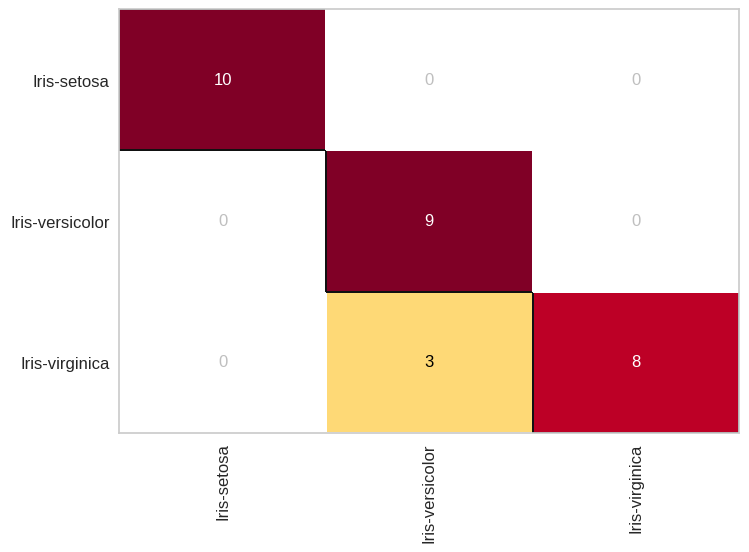

In [38]:
cm = ConfusionMatrix(knn_classe)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)